<a href="https://colab.research.google.com/github/BiancadeFrancisco/RegressaoLogistica_PrevensaoChurn/blob/main/DESAFIO_6_PREVER_CHURN_EM_STREAMING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Utilize um modelo de classificação para mapear qual o perfil de usuários tem mais chance de deixar sua plataforma de streaming. Compreender quem é o perfil que está aumentando o churn do seu negócio é essencial para tomar ações que reduzam essas perdas, seja alterando critérios na venda ou modificando o produto

- **Seu objetivo é criar um modelo de classificação capaz de prever se um usuário tem mais chance de cancelar a sua assinatura na plataforma ou não, levando em consideração o seu perfil no streaming.. Para isso, a empresa forneceu uma base de dados em csv contendo dados sobre as contas dos clientes.**

In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


In [ ]:
sklearn.set_config(transform_output='pandas')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#DATA UNDERSTANDING:

In [ ]:
# CARREGAR BASE DE DADOS:

streaming = pd.read_csv("/content/streaming_data (1).csv")

streaming.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


In [ ]:
# DESCRIÇÃO DADOS:

# TARGET (Y):
# Churned: Se o cliente cancelou a conta ou não (int)

# VARIÁVEIS CATEGÓRICAS (X):

# User_id: identificação cliente (str)
# gender: Gênero do cliente (str)
# Subscription_type: Tipo de conta (str)

# VARIÁVEIS NUMÉRICAS (X):
# age: Idade do cliente (int)
# Time_on_platform: tempo de uso da plataforma (float)
# devices_connected: Quantidade de dispositivos conectados à conta (int)
# Num_streaming_services: Quantidade de serviços de streaming que o cliente possui (int)
# Num_active_profiles: Número de perfis ativos na plataforma (int)
# Avg_rating: Avaliação média dos conteúdos da plataforma (int)

In [ ]:
streaming.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


In [ ]:
streaming.dtypes

Age                       float64
Gender                     object
Time_on_platform          float64
Devices_connected         float64
Subscription_type          object
Num_streaming_services    float64
Num_active_profiles         int64
Avg_rating                float64
Churned                   float64
User_id                    object
dtype: object

In [ ]:
streaming.describe()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
count,66607.000000,56464.000000,52696.000000,9572.000000,77884.000000,60614.000000,61148.000000
mean,43.511072,4385.848505,2.995370,2.496239,3.002273,3.002252,0.243066
std,15.043158,2526.580859,1.414072,1.120700,1.413235,1.154963,0.428938
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,30.000000,2196.000000,2.000000,1.000000,2.000000,1.990000,0.000000
50%,43.000000,4384.000000,3.000000,2.000000,3.000000,3.010000,0.000000
75%,57.000000,6573.000000,4.000000,4.000000,4.000000,4.000000,0.000000
max,69.000000,8759.000000,5.000000,4.000000,5.000000,5.000000,1.000000


In [ ]:
# DADOS NULOS?

streaming.isna().sum()

Age                       11277
Gender                    14516
Time_on_platform          21420
Devices_connected         25188
Subscription_type         25221
Num_streaming_services    68312
Num_active_profiles           0
Avg_rating                17270
Churned                   16736
User_id                       0
dtype: int64

In [ ]:
# DADOS DUPLICADOS?

streaming.duplicated().sum()

12403

In [ ]:
streaming[streaming.duplicated(keep=False)].sort_values(streaming.columns.tolist())

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
21641,18.0,Female,174.0,4.0,Basic,NaN,1,4.91,0.0,5caf911f-7e3e-41fe-81e8-b92c1486d511
70446,18.0,Female,174.0,4.0,Basic,NaN,1,4.91,0.0,5caf911f-7e3e-41fe-81e8-b92c1486d511
232,18.0,Female,174.0,NaN,Premium,NaN,1,1.95,NaN,a8a12a4d-020f-43c5-bcbb-4691b092756b
66428,18.0,Female,174.0,NaN,Premium,NaN,1,1.95,NaN,a8a12a4d-020f-43c5-bcbb-4691b092756b
61310,18.0,Female,259.0,NaN,Premium,NaN,3,4.37,NaN,8ae07362-7ea1-4e49-8798-ccfb5fd528be
...,...,...,...,...,...,...,...,...,...,...
74950,NaN,NaN,NaN,NaN,NaN,NaN,3,1.46,0.0,c7359f1c-6124-4ccf-8692-1ec12f46935e
789,NaN,NaN,NaN,NaN,NaN,NaN,3,2.68,0.0,d3527c6c-e24c-4780-9cee-ad1bd82707ac
70119,NaN,NaN,NaN,NaN,NaN,NaN,3,2.68,0.0,d3527c6c-e24c-4780-9cee-ad1bd82707ac
22340,NaN,NaN,NaN,NaN,NaN,NaN,4,2.28,0.0,6e9cc749-f1de-493c-8ce0-ea91c56d373c


In [ ]:
# FAZER ALGUMAS AGREGAÇÕES PARA ANÁLISES:

churn_agg = streaming.groupby("Churned")["User_id"].count().reset_index()
churn_agg

,Churned,User_id
0,0.0,46285
1,1.0,14863


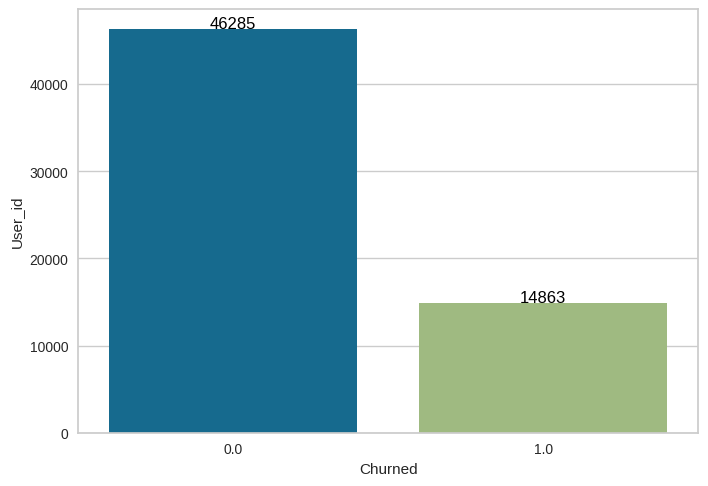

In [ ]:
plot = sns.barplot(data = churn_agg, x="Churned", y="User_id")
for i in plot.patches:
    plot.annotate(int(i.get_height()),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center',
                  va='baseline',
                  fontsize=12,
                  color='black',
                  xytext=(0, 1),
                  textcoords='offset points')

In [ ]:
id_conta = streaming.groupby("Subscription_type")["User_id"].count().reset_index()
id_conta

,Subscription_type,User_id
0,Basic,17527
1,Premium,17625
2,Standard,17511


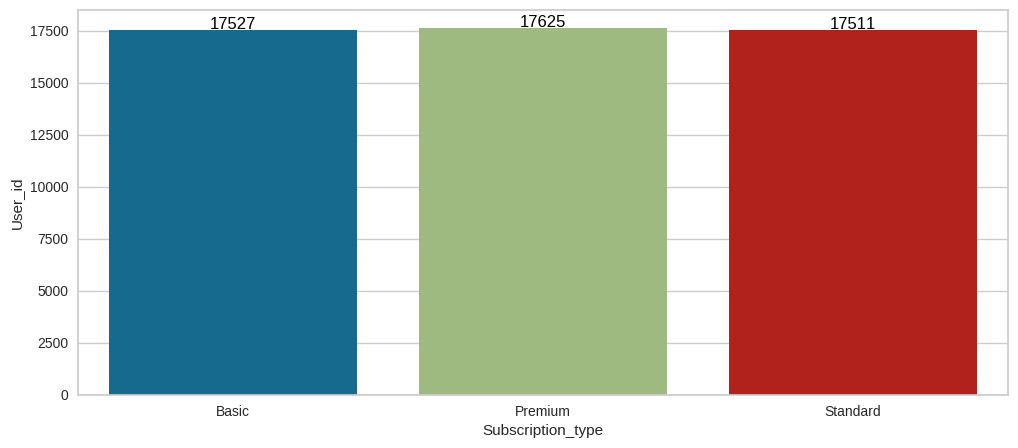

In [ ]:
plt.figure(figsize = (12,5))
plot = sns.barplot(data = id_conta, x="Subscription_type", y="User_id")
for i in plot.patches:
    plot.annotate(int(i.get_height()),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center',
                  va='baseline',
                  fontsize=12,
                  color='black',
                  xytext=(0, 1),
                  textcoords='offset points')

In [ ]:
churn_conta = streaming.groupby("Subscription_type")["Churned"].count().reset_index()
churn_conta

,Subscription_type,Churned
0,Basic,13817
1,Premium,13815
2,Standard,13818


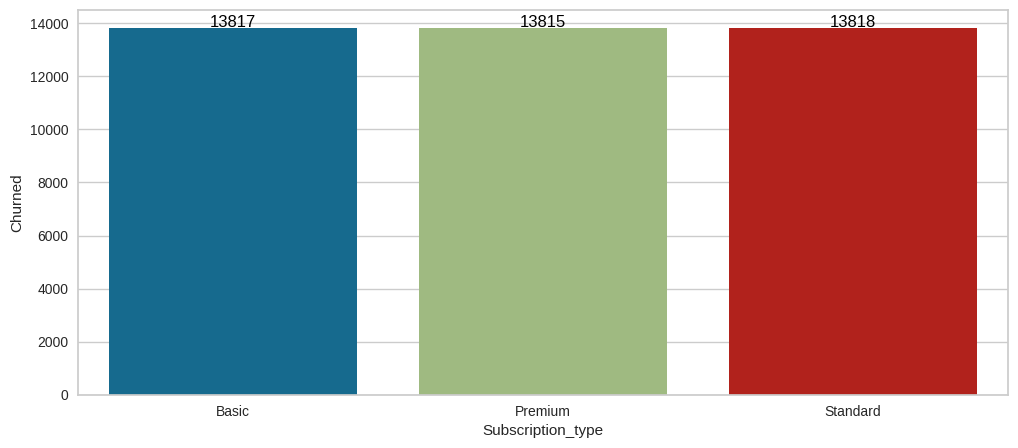

In [ ]:
plt.figure(figsize = (12,5))
plot = sns.barplot(data = churn_conta, x="Subscription_type", y="Churned")
for i in plot.patches:
    plot.annotate(int(i.get_height()),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center',
                  va='baseline',
                  fontsize=12,
                  color='black',
                  xytext=(0, 1),
                  textcoords='offset points')

In [ ]:
id_gender = streaming.groupby("Gender")["User_id"].count().reset_index()
id_gender

,Gender,User_id
0,Female,31572
1,Male,31796


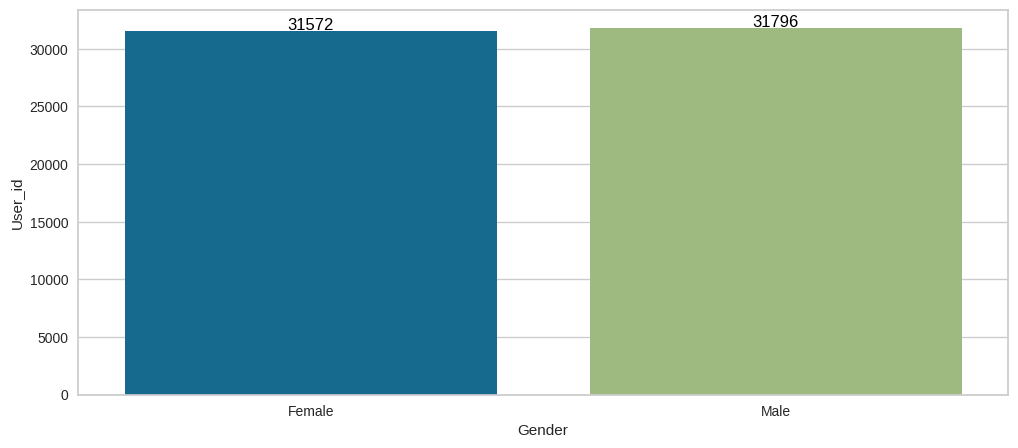

In [ ]:
plt.figure(figsize = (12,5))
plot = sns.barplot(data = id_gender, x="Gender", y="User_id")
for i in plot.patches:
    plot.annotate(int(i.get_height()),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center',
                  va='baseline',
                  fontsize=12,
                  color='black',
                  xytext=(0, 1),
                  textcoords='offset points')

In [ ]:
churn_gender = streaming.groupby("Gender")["Churned"].count().reset_index()
churn_gender

,Gender,Churned
0,Female,24753
1,Male,24957


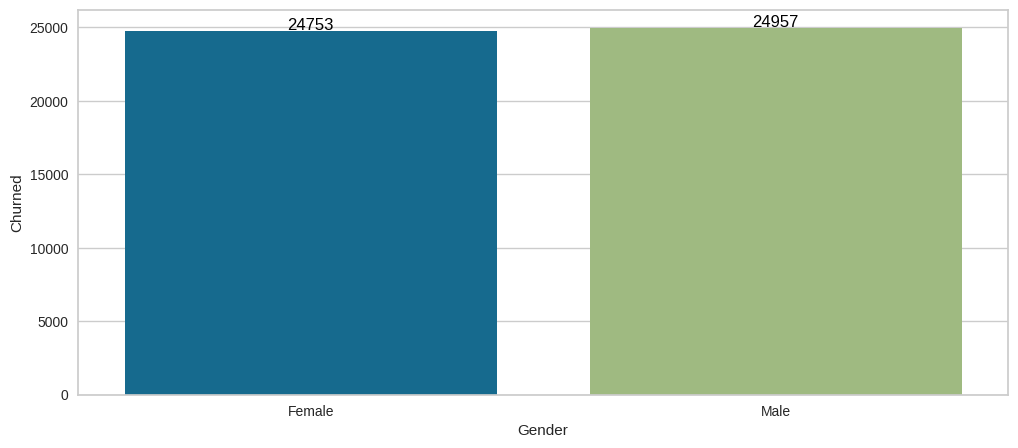

In [ ]:
plt.figure(figsize = (12,5))
plot = sns.barplot(data = churn_gender, x="Gender", y="Churned")
for i in plot.patches:
    plot.annotate(int(i.get_height()),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center',
                  va='baseline',
                  fontsize=12,
                  color='black',
                  xytext=(0, 1),
                  textcoords='offset points')

In [ ]:
streaming.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


#DATA PREPARATION:

In [ ]:
# SUBSTITUIR VALORES NAN POR 0 nas colunas: Time_on_platform, Num_streaming_services, Churned, Avg_rating, Devices_connected:

streaming["Time_on_platform"] = streaming["Time_on_platform"].fillna(0)
streaming["Num_streaming_services"] = streaming["Num_streaming_services"].fillna(0)
streaming["Churned"] = streaming["Churned"].fillna(0)
streaming["Avg_rating"] = streaming["Avg_rating"].fillna(0)
streaming["Devices_connected"] = streaming["Devices_connected"].fillna(0)

In [ ]:
streaming.isna().sum()

Age                       11277
Gender                    14516
Time_on_platform              0
Devices_connected             0
Subscription_type         25221
Num_streaming_services        0
Num_active_profiles           0
Avg_rating                    0
Churned                       0
User_id                       0
dtype: int64

In [ ]:
# DROPAR LINHAS NULAS NAS COLUNAS: Gender, Subscription_type, Age:

streaming = streaming.dropna()

In [ ]:
streaming

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,0.0,3,0.00,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,0.0,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,0.0,5.0,Basic,0.0,2,0.00,0.0,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
5,54.0,Male,3024.0,2.0,Basic,0.0,1,0.00,0.0,a1df3a13-9255-4d00-8a9d-20565fefaab9
...,...,...,...,...,...,...,...,...,...,...
77879,45.0,Male,0.0,0.0,Basic,0.0,5,2.20,0.0,6b51fe0d-d4a1-41ed-a55c-d05f5c961e3c
77880,47.0,Female,6176.0,0.0,Premium,0.0,2,4.54,0.0,59d70167-6be0-474c-b71e-14153205b44f
77881,64.0,Female,0.0,5.0,Premium,0.0,1,4.34,1.0,a7d5ed26-78a4-4e70-bd04-0fec883e56aa
77882,58.0,Male,1314.0,5.0,Standard,0.0,4,0.00,0.0,472e9e70-87ca-4c5e-bfee-fa9f42b54f51


In [ ]:
# AJUSTAR TIPOS DE DADOS:

# Age = int / Devices_connected = int / Num_streaming_services = int / Avg_rating  = int / Churned = int

streaming = streaming.astype({"Age" : "int", "Devices_connected" : "int", "Num_streaming_services" : "int", "Avg_rating" : "int", "Time_on_platform" : "int", "Churned" : "int"})


In [ ]:
streaming.dtypes

Age                        int64
Gender                    object
Time_on_platform           int64
Devices_connected          int64
Subscription_type         object
Num_streaming_services     int64
Num_active_profiles        int64
Avg_rating                 int64
Churned                    int64
User_id                   object
dtype: object

In [ ]:
streaming.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49,Male,4700,3,Basic,0,3,0,0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69,Female,6107,2,Standard,0,1,2,0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44,Male,6374,3,Premium,1,1,1,1,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26,Male,0,5,Basic,0,2,0,0,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
5,54,Male,3024,2,Basic,0,1,0,0,a1df3a13-9255-4d00-8a9d-20565fefaab9


In [ ]:
# TRANSFORMAR VALORES CHURNED 0 E 1 POR NO E YES:

streaming.loc[streaming["Churned"] == 0, "Churned"] = "No"
streaming.loc[streaming["Churned"] == 1, "Churned"] = "Yes"

In [ ]:
streaming.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49,Male,4700,3,Basic,0,3,0,No,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69,Female,6107,2,Standard,0,1,2,No,fe14b048-770b-4619-8ec6-485b0969ae31
2,44,Male,6374,3,Premium,1,1,1,Yes,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26,Male,0,5,Basic,0,2,0,No,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
5,54,Male,3024,2,Basic,0,1,0,No,a1df3a13-9255-4d00-8a9d-20565fefaab9


In [ ]:
NUMERICAL_FEATURES = ['Avg_rating','Time_on_platform','Age', "Devices_connected", "Num_streaming_services", "Num_active_profiles"]
CATEGORICAL_FEATURES = ["Gender", "Subscription_type", "Churned"]

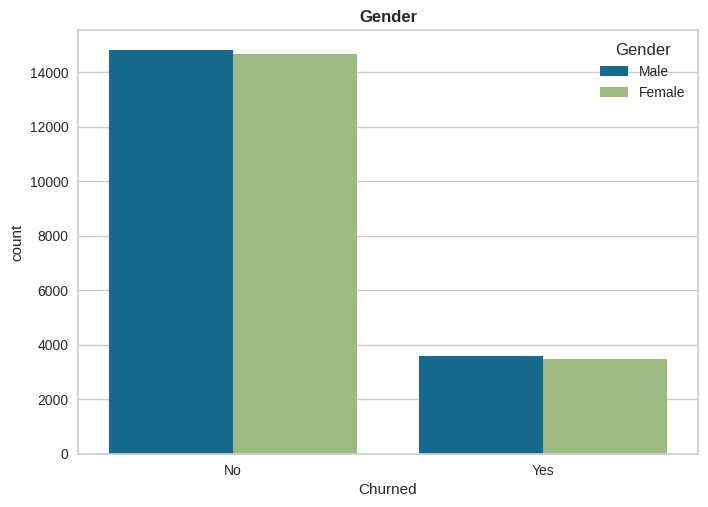

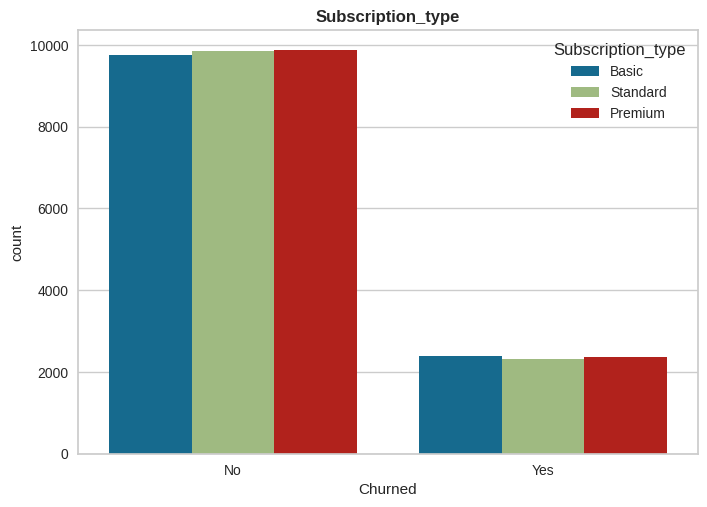

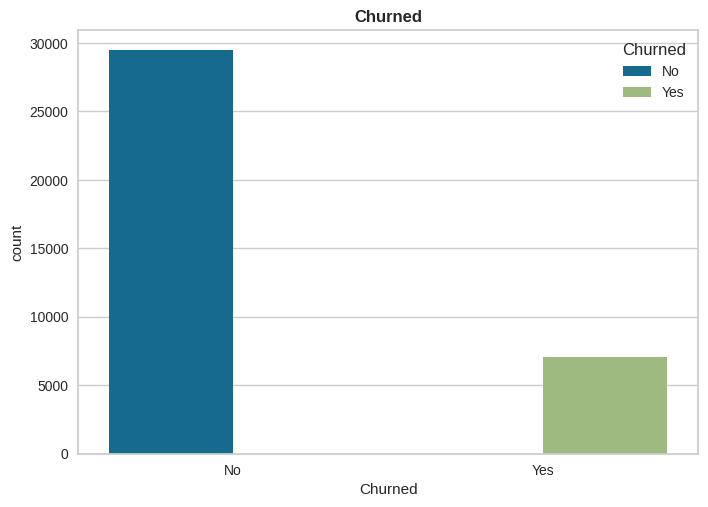

In [ ]:
for categorical_feature in CATEGORICAL_FEATURES:
  sns.countplot(data=streaming, x='Churned', hue=categorical_feature)
  plt.title(categorical_feature, weight='bold')
  plt.show()




In [ ]:
streaming.Churned.value_counts()

No     29459
Yes     7056
Name: Churned, dtype: int64

#DATA MODELLING:

- REGRESSÃO LOGISTICA

In [ ]:
# DISTRIBUIR X E Y:

X = streaming.drop(columns=["User_id", "Churned"], axis = 1) #excluir coluna User_id, pois não há necessidade de identificar o cliente, mas sim o seu perfil

y = streaming[["Churned"]].copy()
y = pd.DataFrame(y)

In [ ]:
y

,Churned
0,No
1,No
2,Yes
3,No
5,No
...,...
77879,No
77880,No
77881,Yes
77882,No


In [ ]:
X.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating
0,49,Male,4700,3,Basic,0,3,0
1,69,Female,6107,2,Standard,0,1,2
2,44,Male,6374,3,Premium,1,1,1
3,26,Male,0,5,Basic,0,2,0
5,54,Male,3024,2,Basic,0,1,0


In [ ]:
# TRANSFORMAR VARIÁVEIS CATEGÓRICAS DO X EM DUMMIES (gender: Gênero do cliente (str) e Subscription_type: Tipo de conta (str)):

X = pd.get_dummies(X)

In [ ]:
X.head()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Gender_Female,Gender_Male,Subscription_type_Basic,Subscription_type_Premium,Subscription_type_Standard
0,49,4700,3,0,3,0,0,1,1,0,0
1,69,6107,2,0,1,2,1,0,0,0,1
2,44,6374,3,1,1,1,0,1,0,1,0
3,26,0,5,0,2,0,0,1,1,0,0
5,54,3024,2,0,1,0,0,1,1,0,0


In [ ]:
# TRANSFORMAR COLUNA "CHURNED" EM FORMATO BINÁRIO:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(y.Churned)

y.Churned = le.transform(y.Churned)

In [ ]:
y

,Churned
0,0
1,0
2,1
3,0
5,0
...,...
77879,0
77880,0
77881,1
77882,0


In [ ]:
y.isnull().any()

Churned    False
dtype: bool

In [ ]:
# FAZER NORMALIZAÇÃO DAS VARIÁVEIS X:

from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

X = pd.DataFrame(mm.fit_transform(X))

In [ ]:
# SEPARAR TREINO E TESTE:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [ ]:
# TESTAR MODELO DE ALGORITMO DE CLASSIFICAÇÃO: REGRESSÃO LOGÍSTICA

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
lr = model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
lr.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# assign para ficar na mesma base do x e y:

X_test.assign(churned=y_test).assign(label=lr.predict(X_test))

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Gender_Female,Gender_Male,Subscription_type_Basic,Subscription_type_Premium,Subscription_type_Standard,churned,label
26152,0.627451,0.872931,0.8,0.00,0.50,0.0,1.0,0.0,0.0,1.0,0.0,0,0
2392,0.450980,0.000000,0.0,0.25,0.75,0.2,1.0,0.0,0.0,0.0,1.0,1,0
53041,0.549020,0.298778,0.8,0.00,0.25,0.0,1.0,0.0,1.0,0.0,0.0,1,0
22841,0.588235,0.000000,0.0,0.00,0.75,0.4,0.0,1.0,0.0,0.0,1.0,0,0
49427,0.019608,0.458157,0.0,0.00,0.75,0.6,0.0,1.0,0.0,1.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8673,0.843137,0.390227,0.8,0.00,1.00,0.0,1.0,0.0,0.0,1.0,0.0,0,0
74325,0.333333,0.000000,0.0,0.00,1.00,0.2,1.0,0.0,1.0,0.0,0.0,0,0
49191,0.686275,0.901130,1.0,0.00,0.50,0.0,1.0,0.0,0.0,0.0,1.0,0,0
77419,0.588235,0.292842,0.2,0.75,1.00,0.4,1.0,0.0,0.0,1.0,0.0,0,0


In [ ]:
# IMPORTAR MATRIZ DE CONFUSÃO:

from yellowbrick.classifier import (
    confusion_matrix
)

In [ ]:
# IMPORTAR METRICAS:

from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


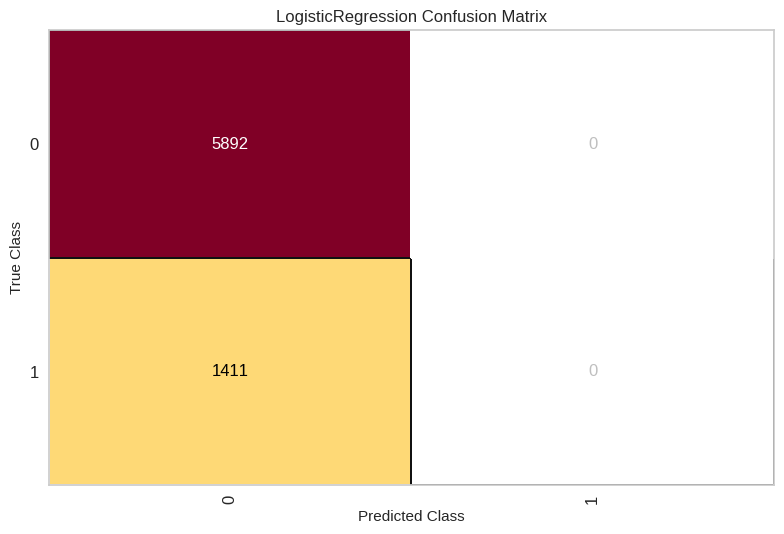

ConfusionMatrix(ax=<Axes: title={'center': 'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                cmap=<matplotlib.colors.ListedColormap object at 0x7a7a81460490>,
                estimator=LogisticRegression())

In [ ]:
# EXECUTAR A MATRIZ DE CONFUSÃO EM VALORES REAIS E PREVISTOS:

confusion_matrix(lr, X_train, y_train, X_test, y_test)

In [ ]:
# VERIFICAR METRICAS:

metricasLR = {
    "model": ["Logistic Regression", "Logistic Regression"],
    "modo": ["Treino", "Teste"],
    "accuracy": [accuracy_score(y_train, lr.predict(X_train)), accuracy_score(y_test, lr.predict(X_test))],
    "balanced_accuracy": [balanced_accuracy_score(y_train, lr.predict(X_train)), balanced_accuracy_score(y_test, lr.predict(X_test))],
    "f1_score": [f1_score(y_train, lr.predict(X_train)), f1_score(y_test, lr.predict(X_test))],
    "precision_score": [precision_score(y_train, lr.predict(X_train)), precision_score(y_test, lr.predict(X_test))],
    "recal_score": [recall_score(y_train, lr.predict(X_train)), recall_score(y_test, lr.predict(X_test))],
    "roc_auc": [roc_auc_score(y_train, lr.predict(X_train)), roc_auc_score(y_test, lr.predict(X_test))]
}

pd.DataFrame(metricasLR)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,model,modo,accuracy,balanced_accuracy,f1_score,precision_score,recal_score,roc_auc
0,Logistic Regression,Treino,0.806757,0.5,0.0,0.0,0.0,0.5
1,Logistic Regression,Teste,0.806792,0.5,0.0,0.0,0.0,0.5


- REGRESSÃO LOGISTICA COM TUNNING

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = [{'penalty':['l1','l2']},
              {'C':[1, 10, 100, 1000]}]
grid_search = GridSearchCV(lr, parameters, scoring = 'accuracy', cv = 5, verbose=0)


grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [ ]:
# VERIFICAR HIPER PARAMETROS:

grid_search.best_estimator_.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# TUNNAR MODELO COM OS HIPER PARAMETROS:

lr_tunned = LogisticRegression(
C = 1.0,
class_weight = None,
dual = False,
fit_intercept = True,
intercept_scaling = 1,
l1_ratio = None,
max_iter = 100,
multi_class = 'auto',
n_jobs = None,
penalty = 'l2',
random_state = None,
solver = 'lbfgs',
tol = 0.0001,
verbose = 0,
warm_start = False)

In [ ]:
# TREINAR MODELO TUNNADO:

lr_tunned.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
# assign para ficar na mesma base do x e y:

X_test.assign(churn=y_test).assign(label=lr_tunned.predict(X_test))

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Gender_Female,Gender_Male,Subscription_type_Basic,Subscription_type_Premium,Subscription_type_Standard,churn,label
26152,0.627451,0.872931,0.8,0.00,0.50,0.0,1.0,0.0,0.0,1.0,0.0,0,0
2392,0.450980,0.000000,0.0,0.25,0.75,0.2,1.0,0.0,0.0,0.0,1.0,1,0
53041,0.549020,0.298778,0.8,0.00,0.25,0.0,1.0,0.0,1.0,0.0,0.0,1,0
22841,0.588235,0.000000,0.0,0.00,0.75,0.4,0.0,1.0,0.0,0.0,1.0,0,0
49427,0.019608,0.458157,0.0,0.00,0.75,0.6,0.0,1.0,0.0,1.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8673,0.843137,0.390227,0.8,0.00,1.00,0.0,1.0,0.0,0.0,1.0,0.0,0,0
74325,0.333333,0.000000,0.0,0.00,1.00,0.2,1.0,0.0,1.0,0.0,0.0,0,0
49191,0.686275,0.901130,1.0,0.00,0.50,0.0,1.0,0.0,0.0,0.0,1.0,0,0
77419,0.588235,0.292842,0.2,0.75,1.00,0.4,1.0,0.0,0.0,1.0,0.0,0,0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


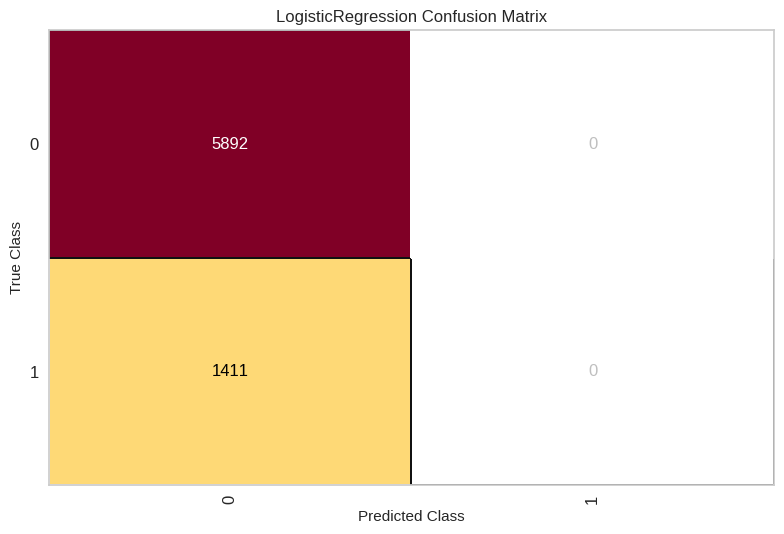

ConfusionMatrix(ax=<Axes: title={'center': 'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                cmap=<matplotlib.colors.ListedColormap object at 0x7a7a80258fd0>,
                estimator=LogisticRegression())

In [ ]:
# EXECUTAR A MATRIZ DE CONFUSÃO EM VALORES REAIS E PREVISTOS:

confusion_matrix(lr_tunned, X_train, y_train, X_test, y_test)

In [ ]:
# VERIFICAR METRICAS:

metricasLR_Tunned = {
    "model": ["Logistic Regression Tunned", "Logistic Regression Tunned"],
    "modo": ["Treino", "Teste"],
    "accuracy": [accuracy_score(y_train, lr_tunned.predict(X_train)), accuracy_score(y_test, lr_tunned.predict(X_test))],
    "balanced_accuracy": [balanced_accuracy_score(y_train, lr_tunned.predict(X_train)), balanced_accuracy_score(y_test, lr_tunned.predict(X_test))],
    "f1_score": [f1_score(y_train, lr_tunned.predict(X_train)), f1_score(y_test, lr_tunned.predict(X_test))],
    "precision_score": [precision_score(y_train, lr_tunned.predict(X_train)), precision_score(y_test, lr_tunned.predict(X_test))],
    "recal_score": [recall_score(y_train, lr_tunned.predict(X_train)), recall_score(y_test, lr_tunned.predict(X_test))],
    "roc_auc": [roc_auc_score(y_train, lr_tunned.predict(X_train)), roc_auc_score(y_test, lr_tunned.predict(X_test))]
}

pd.DataFrame(metricasLR_Tunned)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,model,modo,accuracy,balanced_accuracy,f1_score,precision_score,recal_score,roc_auc
0,Logistic Regression Tunned,Treino,0.806757,0.5,0.0,0.0,0.0,0.5
1,Logistic Regression Tunned,Teste,0.806792,0.5,0.0,0.0,0.0,0.5


- RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)

<ipython-input-201-168a6fc83696>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
# assign para ficar na mesma base do x e y:

X_test.assign(churned=y_test).assign(label=rf.predict(X_test))

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Gender_Female,Gender_Male,Subscription_type_Basic,Subscription_type_Premium,Subscription_type_Standard,churned,label
2341,0.058824,0.684439,0.2,0.00,0.25,0.6,0.0,1.0,0.0,0.0,1.0,1,0
51122,0.568627,0.042128,0.2,0.00,1.00,0.2,0.0,1.0,0.0,0.0,1.0,1,0
27806,0.882353,0.000000,0.2,0.75,0.00,0.8,1.0,0.0,0.0,0.0,1.0,0,0
5007,0.450980,0.000000,0.0,1.00,0.25,0.8,1.0,0.0,0.0,0.0,1.0,0,0
49327,0.568627,0.595273,0.8,0.00,0.75,0.0,0.0,1.0,1.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19038,0.666667,0.861628,1.0,0.00,0.00,0.6,0.0,1.0,0.0,0.0,1.0,0,0
27595,0.313725,0.546181,0.6,0.00,1.00,0.2,0.0,1.0,1.0,0.0,0.0,1,0
28025,0.019608,0.014728,0.0,0.00,1.00,0.0,1.0,0.0,1.0,0.0,0.0,0,0
13186,0.196078,0.269551,0.2,0.00,0.50,0.0,0.0,1.0,1.0,0.0,0.0,0,0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


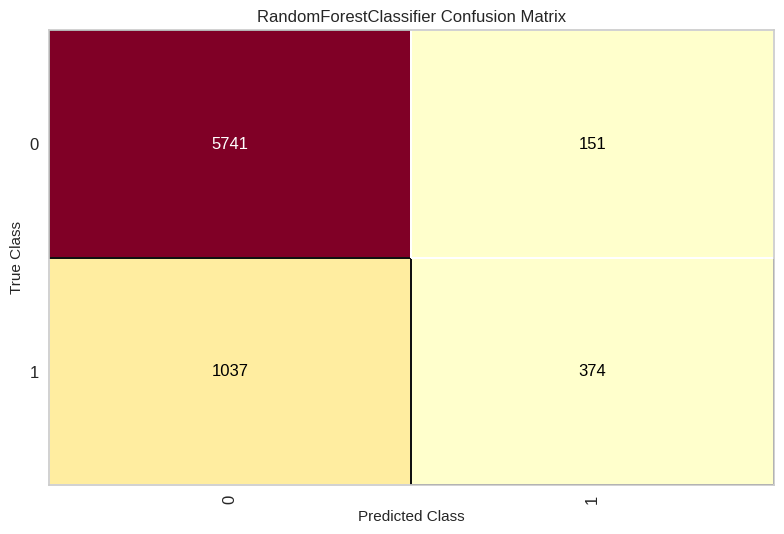

ConfusionMatrix(ax=<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                cmap=<matplotlib.colors.ListedColormap object at 0x7a7a8136dfc0>,
                estimator=RandomForestClassifier())

In [ ]:
# EXECUTAR A MATRIZ DE CONFUSÃO EM VALORES REAIS E PREVISTOS:

confusion_matrix(rf, X_train, y_train, X_test, y_test)

In [ ]:
# VERIFICAR METRICAS:

metricasRF = {
    "model": ["Random Forest", "Random Forest"],
    "modo": ["Treino", "Teste"],
    "accuracy": [accuracy_score(y_train, rf.predict(X_train)), accuracy_score(y_test, rf.predict(X_test))],
    "balanced_accuracy": [balanced_accuracy_score(y_train, rf.predict(X_train)), balanced_accuracy_score(y_test, rf.predict(X_test))],
    "f1_score": [f1_score(y_train, rf.predict(X_train)), f1_score(y_test, rf.predict(X_test))],
    "precision_score": [precision_score(y_train, rf.predict(X_train)), precision_score(y_test, rf.predict(X_test))],
    "recal_score": [recall_score(y_train, rf.predict(X_train)), recall_score(y_test, rf.predict(X_test))],
    "roc_auc": [roc_auc_score(y_train, rf.predict(X_train)), roc_auc_score(y_test, rf.predict(X_test))]
}

pd.DataFrame(metricasRF)

,model,modo,accuracy,balanced_accuracy,f1_score,precision_score,recal_score,roc_auc
0,Random Forest,Treino,0.994420,0.988661,0.985471,0.991747,0.979274,0.988661
1,Random Forest,Teste,0.837327,0.619716,0.386364,0.712381,0.265060,0.619716


- RANDOM FOREST COM TUNNING

In [ ]:
grid_search?

In [ ]:
parameters = {
    "max_depth": [1,2,3,4,5,6,7,8,9,10],
    "n_estimators": [100, 300, 500]
}

grid_search = GridSearchCV(rf, parameters, scoring="accuracy", cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy')

In [ ]:
# VERIFICAR HIPER PARAMETROS:

grid_search.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# TUNNAR MODELO COM OS HIPER PARAMETROS:

rf_tunned = RandomForestClassifier(
bootstrap = True,
ccp_alpha = 0.0,
class_weight = None,
criterion = 'gini',
max_depth = 10,
max_features = 'sqrt',
max_leaf_nodes = None,
max_samples = None,
min_impurity_decrease = 0.0,
min_samples_leaf = 1,
min_samples_split = 2,
min_weight_fraction_leaf = 0.0,
n_estimators = 100,
n_jobs = None,
oob_score = False,
random_state = None,
verbose = 0,
warm_start = False)

In [ ]:
# TREINAR MODELO TUNNADO:

rf_tunned.fit(X_train, y_train)

<ipython-input-208-08811392e672>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_tunned.fit(X_train, y_train)


RandomForestClassifier(max_depth=10)

In [ ]:
# assign para ficar na mesma base do x e y:

X_test.assign(churned=y_test).assign(label=rf_tunned.predict(X_test))

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Gender_Female,Gender_Male,Subscription_type_Basic,Subscription_type_Premium,Subscription_type_Standard,churned,label
2341,0.058824,0.684439,0.2,0.00,0.25,0.6,0.0,1.0,0.0,0.0,1.0,1,0
51122,0.568627,0.042128,0.2,0.00,1.00,0.2,0.0,1.0,0.0,0.0,1.0,1,0
27806,0.882353,0.000000,0.2,0.75,0.00,0.8,1.0,0.0,0.0,0.0,1.0,0,0
5007,0.450980,0.000000,0.0,1.00,0.25,0.8,1.0,0.0,0.0,0.0,1.0,0,0
49327,0.568627,0.595273,0.8,0.00,0.75,0.0,0.0,1.0,1.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19038,0.666667,0.861628,1.0,0.00,0.00,0.6,0.0,1.0,0.0,0.0,1.0,0,0
27595,0.313725,0.546181,0.6,0.00,1.00,0.2,0.0,1.0,1.0,0.0,0.0,1,0
28025,0.019608,0.014728,0.0,0.00,1.00,0.0,1.0,0.0,1.0,0.0,0.0,0,0
13186,0.196078,0.269551,0.2,0.00,0.50,0.0,0.0,1.0,1.0,0.0,0.0,0,0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


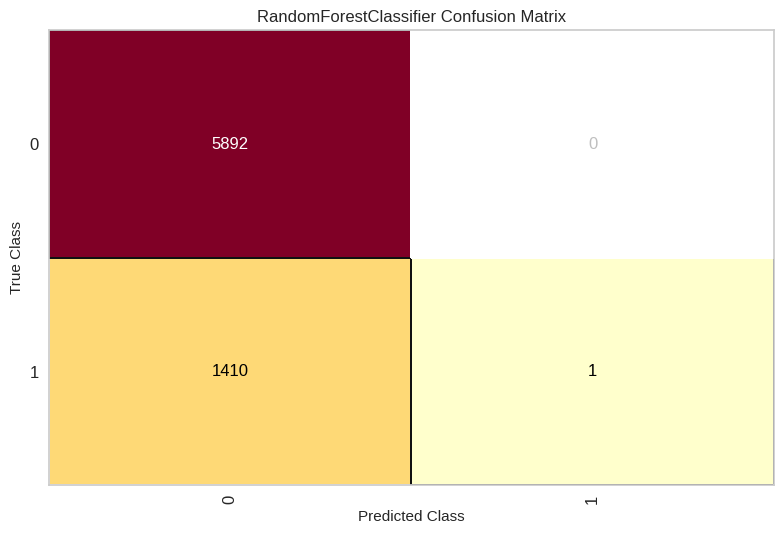

ConfusionMatrix(ax=<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                cmap=<matplotlib.colors.ListedColormap object at 0x7a7a815eba90>,
                estimator=RandomForestClassifier(max_depth=10))

In [ ]:
# EXECUTAR A MATRIZ DE CONFUSÃO EM VALORES REAIS E PREVISTOS:

confusion_matrix(rf_tunned, X_train, y_train, X_test, y_test)

In [ ]:
# VERIFICAR METRICAS:

metricasRF_Tunned = {
    "model": ["Random Forest Tunned", "Random Forest Tunned"],
    "modo": ["Treino", "Teste"],
    "accuracy": [accuracy_score(y_train, rf_tunned.predict(X_train)), accuracy_score(y_test, rf_tunned.predict(X_test))],
    "balanced_accuracy": [balanced_accuracy_score(y_train, rf_tunned.predict(X_train)), balanced_accuracy_score(y_test, rf_tunned.predict(X_test))],
    "f1_score": [f1_score(y_train, rf_tunned.predict(X_train)), f1_score(y_test, rf_tunned.predict(X_test))],
    "precision_score": [precision_score(y_train, rf_tunned.predict(X_train)), precision_score(y_test, rf_tunned.predict(X_test))],
    "recal_score": [recall_score(y_train, rf_tunned.predict(X_train)), recall_score(y_test, rf_tunned.predict(X_test))],
    "roc_auc": [roc_auc_score(y_train, rf_tunned.predict(X_train)), roc_auc_score(y_test, rf_tunned.predict(X_test))]
}

pd.DataFrame(metricasRF_Tunned)

,model,modo,accuracy,balanced_accuracy,f1_score,precision_score,recal_score,roc_auc
0,Random Forest Tunned,Treino,0.807784,0.502657,0.010573,1.0,0.005314,0.502657
1,Random Forest Tunned,Teste,0.806929,0.500354,0.001416,1.0,0.000709,0.500354


#RESUMO MÉTRICAS:

In [ ]:
# COMPARANDO MÉTRICAS:

metricas = {
    "model": ["Logistic Regression", "Logistic Regression", "Logistic Regression Tunned", "Logistic Regression Tunned", "Random Forest", "Random Forest", "Random Forest Tunned", "Random Forest Tunned"],
    "modo": ["Treino", "Teste", "Treino", "Teste", "Treino", "Teste", "Treino", "Teste"],
    "accuracy": [accuracy_score(y_train, lr.predict(X_train)), accuracy_score(y_test, lr.predict(X_test)), accuracy_score(y_train, lr_tunned.predict(X_train)), accuracy_score(y_test, lr_tunned.predict(X_test)),
                 accuracy_score(y_train, rf.predict(X_train)), accuracy_score(y_test, rf.predict(X_test)), accuracy_score(y_train, rf_tunned.predict(X_train)), accuracy_score(y_test, rf_tunned.predict(X_test))],
    "balanced_accuracy": [balanced_accuracy_score(y_train, lr.predict(X_train)), balanced_accuracy_score(y_test, lr.predict(X_test)), balanced_accuracy_score(y_train, lr_tunned.predict(X_train)),
                          balanced_accuracy_score(y_test, lr_tunned.predict(X_test)), balanced_accuracy_score(y_train, rf.predict(X_train)), balanced_accuracy_score(y_test, rf.predict(X_test)),
                          balanced_accuracy_score(y_train, rf_tunned.predict(X_train)), balanced_accuracy_score(y_test, rf_tunned.predict(X_test))],
    "f1_score": [f1_score(y_train, lr.predict(X_train)), f1_score(y_test, lr.predict(X_test)), f1_score(y_train, lr_tunned.predict(X_train)), f1_score(y_test, lr_tunned.predict(X_test)),
                 f1_score(y_train, rf.predict(X_train)), f1_score(y_test, rf.predict(X_test)), f1_score(y_train, rf_tunned.predict(X_train)), f1_score(y_test, rf_tunned.predict(X_test))],
    "precision_score": [precision_score(y_train, lr.predict(X_train)), precision_score(y_test, lr.predict(X_test)), precision_score(y_train, lr_tunned.predict(X_train)),
                        precision_score(y_test, lr_tunned.predict(X_test)), precision_score(y_train, rf.predict(X_train)), precision_score(y_test, rf.predict(X_test)),
                        precision_score(y_train, rf_tunned.predict(X_train)), precision_score(y_test, rf_tunned.predict(X_test))],
    "recal_score": [recall_score(y_train, lr.predict(X_train)), recall_score(y_test, lr.predict(X_test)), recall_score(y_train, lr_tunned.predict(X_train)), recall_score(y_test, lr_tunned.predict(X_test)),
                    recall_score(y_train, rf.predict(X_train)), recall_score(y_test, rf.predict(X_test)), recall_score(y_train, rf_tunned.predict(X_train)), recall_score(y_test, rf_tunned.predict(X_test))],
    "roc_auc": [roc_auc_score(y_train, lr.predict(X_train)), roc_auc_score(y_test, lr.predict(X_test)), roc_auc_score(y_train, lr_tunned.predict(X_train)), roc_auc_score(y_test, lr_tunned.predict(X_test)),
                roc_auc_score(y_train, rf.predict(X_train)), roc_auc_score(y_test, rf.predict(X_test)), roc_auc_score(y_train, rf_tunned.predict(X_train)), roc_auc_score(y_test, rf_tunned.predict(X_test))]
}

pd.DataFrame(metricas)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

,model,modo,accuracy,balanced_accuracy,f1_score,precision_score,recal_score,roc_auc
0,Logistic Regression,Treino,0.806757,0.500000,0.000000,0.000000,0.000000,0.500000
1,Logistic Regression,Teste,0.806792,0.500000,0.000000,0.000000,0.000000,0.500000
2,Logistic Regression Tunned,Treino,0.806757,0.500000,0.000000,0.000000,0.000000,0.500000
3,Logistic Regression Tunned,Teste,0.806792,0.500000,0.000000,0.000000,0.000000,0.500000
4,Random Forest,Treino,0.964022,0.916541,0.900143,0.970697,0.839150,0.916541
5,Random Forest,Teste,0.958921,0.908245,0.885932,0.955701,0.825656,0.908245
6,Random Forest Tunned,Treino,0.807750,0.502569,0.010222,1.000000,0.005137,0.502569
7,Random Forest Tunned,Teste,0.807066,0.500709,0.002831,1.000000,0.001417,0.500709
